In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=1)

In [3]:
x = torch.from_numpy(x_numpy.astype(np.float32))

In [4]:
y = torch.from_numpy(y_numpy.astype(np.float32))

In [5]:
y = y.view(y.shape[0], 1)

In [6]:
n_samples, n_features = x.shape

In [7]:
input_size = n_features
output_size = 1
learning_rate = 0.01

In [8]:
model = nn.Linear(input_size, output_size)

In [9]:
criterion = nn.MSELoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [11]:
n_epochs = 100
for epoch in range(n_epochs):
    y_predicted = model(x)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch%10==0:
        print(f"epoch: {epoch}, loss: {loss.item():.4f}")

epoch: 0, loss: 5623.8652
epoch: 10, loss: 4168.5664
epoch: 20, loss: 3116.0928
epoch: 30, loss: 2354.1030
epoch: 40, loss: 1801.8597
epoch: 50, loss: 1401.2494
epoch: 60, loss: 1110.3829
epoch: 70, loss: 899.0269
epoch: 80, loss: 745.3329
epoch: 90, loss: 633.4933


In [12]:
predicted = model(x).detach().numpy()

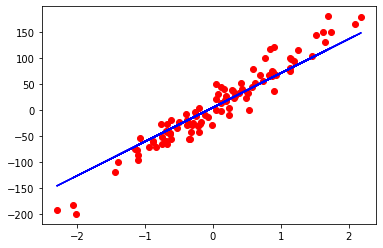

In [13]:
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()